# Visualizing Home Values in Seattle and Boston

In [1]:
import csv
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

In [13]:
import matplotlib.dates as mdates

In [4]:
os.chdir('file path')
hv = pd.read_csv('CityHomeValuesUptoOctober2022.csv')
hv

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253767.0,255586.0,...,733761.0,738811.0,745235.0,750940.0,757659.0,762851.0,766936.0,769342.0,771456.0,774132.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,246626.0,246869.0,...,1000394.0,1010508.0,1028347.0,1049762.0,1069084.0,1071542.0,1072346.0,1056961.0,1044717.0,1028985.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,111380.0,111377.0,...,254526.0,257994.0,262481.0,267302.0,271901.0,275363.0,277586.0,278969.0,279206.0,279833.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,165170.0,165509.0,...,299525.0,301079.0,303248.0,304806.0,307991.0,310419.0,311762.0,311400.0,311186.0,311233.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,115484.0,115666.0,...,276017.0,280498.0,286224.0,291901.0,296995.0,299972.0,301044.0,301370.0,301196.0,300681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22446,54589,28439,Strawberry Point,city,IA,IA,NaN,Clayton County,NaN,NaN,...,119568.0,121120.0,121367.0,121539.0,121817.0,122423.0,122971.0,123438.0,123583.0,123844.0
22447,21230,28439,West Leipsic,city,OH,OH,NaN,Putnam County,NaN,NaN,...,84609.0,85550.0,85500.0,84738.0,84748.0,85225.0,86174.0,87019.0,87645.0,87992.0
22448,24470,28439,Eakly,city,OK,OK,NaN,Caddo County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97007.0,97583.0,98347.0
22449,12973,28439,Newcastle,city,NE,NE,"Sioux City, IA-NE-SD",Dixon County,NaN,NaN,...,86334.0,87303.0,87475.0,87673.0,89524.0,92202.0,94998.0,96428.0,97099.0,98134.0


#### Zooming in on Seattle home prices.

In [5]:
seattle_hv = hv.loc[hv['RegionName'] == 'Seattle'].drop(columns = ['RegionID', 'RegionType', 'SizeRank', 
                                                                   'StateName','State', 'Metro', 'CountyName'])
print(seattle_hv)

   RegionName  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  \
21    Seattle    270063.0    271870.0    273518.0    276733.0    280062.0   

    2000-06-30  2000-07-31  2000-08-31  2000-09-30  ...  2022-01-31  \
21    282754.0    285756.0    287666.0    289352.0  ...    973931.0   

    2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  2022-07-31  \
21    988550.0   1011041.0   1036088.0   1046956.0   1041471.0   1028294.0   

    2022-08-31  2022-09-30  2022-10-31  
21   1017744.0   1013332.0   1008841.0  

[1 rows x 275 columns]


In [6]:
seattle_hv = seattle_hv.drop(columns = ['RegionName'])
print(seattle_hv)

    2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  \
21    270063.0    271870.0    273518.0    276733.0    280062.0    282754.0   

    2000-07-31  2000-08-31  2000-09-30  2000-10-31  ...  2022-01-31  \
21    285756.0    287666.0    289352.0    290418.0  ...    973931.0   

    2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  2022-07-31  \
21    988550.0   1011041.0   1036088.0   1046956.0   1041471.0   1028294.0   

    2022-08-31  2022-09-30  2022-10-31  
21   1017744.0   1013332.0   1008841.0  

[1 rows x 274 columns]


In [7]:
seattle_restr = seattle_hv.stack()
print(seattle_restr.head(10))

21  2000-01-31    270063.0
    2000-02-29    271870.0
    2000-03-31    273518.0
    2000-04-30    276733.0
    2000-05-31    280062.0
    2000-06-30    282754.0
    2000-07-31    285756.0
    2000-08-31    287666.0
    2000-09-30    289352.0
    2000-10-31    290418.0
dtype: float64


In [8]:
seattle_restr = seattle_restr.reset_index()
print(seattle_restr.head(10))

   level_0     level_1         0
0       21  2000-01-31  270063.0
1       21  2000-02-29  271870.0
2       21  2000-03-31  273518.0
3       21  2000-04-30  276733.0
4       21  2000-05-31  280062.0
5       21  2000-06-30  282754.0
6       21  2000-07-31  285756.0
7       21  2000-08-31  287666.0
8       21  2000-09-30  289352.0
9       21  2000-10-31  290418.0


In [9]:
seattle_restr.columns = ['Index', 'YYYY-MM-DD', 'HomeValue']
print(seattle_restr.head(10))

   Index  YYYY-MM-DD  HomeValue
0     21  2000-01-31   270063.0
1     21  2000-02-29   271870.0
2     21  2000-03-31   273518.0
3     21  2000-04-30   276733.0
4     21  2000-05-31   280062.0
5     21  2000-06-30   282754.0
6     21  2000-07-31   285756.0
7     21  2000-08-31   287666.0
8     21  2000-09-30   289352.0
9     21  2000-10-31   290418.0


In [10]:
seattle_restr = seattle_restr.drop(columns='Index')
print(seattle_restr.head(10))

   YYYY-MM-DD  HomeValue
0  2000-01-31   270063.0
1  2000-02-29   271870.0
2  2000-03-31   273518.0
3  2000-04-30   276733.0
4  2000-05-31   280062.0
5  2000-06-30   282754.0
6  2000-07-31   285756.0
7  2000-08-31   287666.0
8  2000-09-30   289352.0
9  2000-10-31   290418.0


#### Plotting data in a line chart

In [11]:
seattle_restr["YYYY-MM-DD"] = pd.to_datetime(seattle_restr["YYYY-MM-DD"])

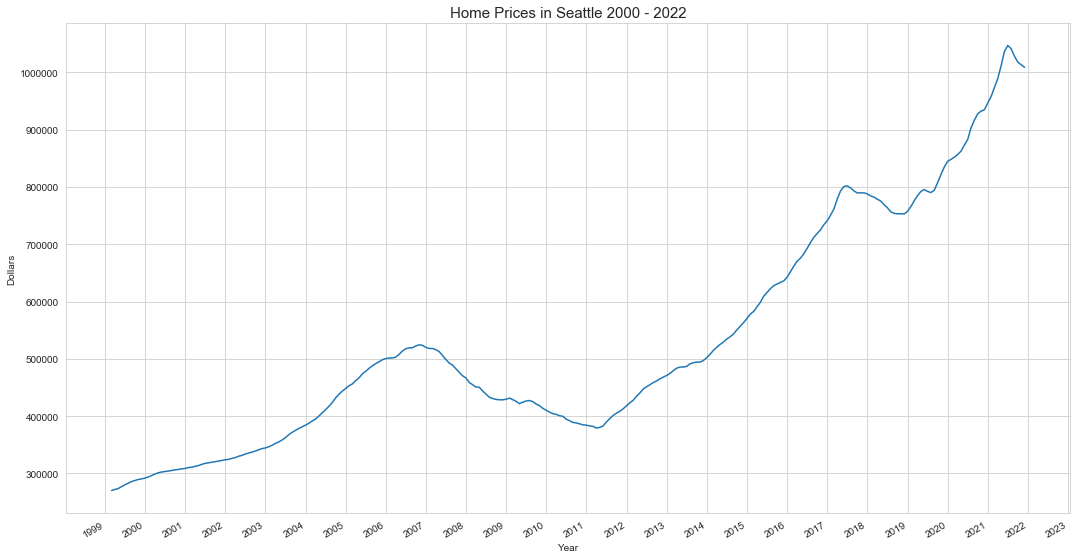

In [15]:
line,ax = plt.subplots(figsize=(18,10))
ax = sns.lineplot(x = "YYYY-MM-DD", y = "HomeValue", data=seattle_restr)
ax.set_title("Home Prices in Seattle 2000 - 2022", fontsize=15)
ax.set_xlabel ("Year")
ax.set_ylabel ("Dollars")

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))

year_locator = mdates.MonthLocator(interval=12)
year_formatter = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(year_formatter)

line.autofmt_xdate()

plt.show()

#### Zooming in on Boston home prices.

In [16]:
boston_hv = hv.loc[(hv['RegionName'] == 'Boston') & (hv['RegionID'] == 44269)].drop(columns = ['RegionType', 'SizeRank', 
                                                                   'StateName','State', 'Metro', 'CountyName'])
print(boston_hv)

    RegionID RegionName  2000-01-31  2000-02-29  2000-03-31  2000-04-30  \
26     44269     Boston    225343.0    227005.0    228915.0    232289.0   

    2000-05-31  2000-06-30  2000-07-31  2000-08-31  ...  2022-01-31  \
26    233490.0    234197.0    235767.0    241356.0  ...    733773.0   

    2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  2022-07-31  \
26    743091.0    749438.0    756949.0    761997.0    764472.0    764290.0   

    2022-08-31  2022-09-30  2022-10-31  
26    763425.0    763430.0    761174.0  

[1 rows x 276 columns]


In [17]:
boston_hv = boston_hv.drop(columns = ['RegionID','RegionName'])
print(boston_hv)

    2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  \
26    225343.0    227005.0    228915.0    232289.0    233490.0    234197.0   

    2000-07-31  2000-08-31  2000-09-30  2000-10-31  ...  2022-01-31  \
26    235767.0    241356.0    246436.0    251101.0  ...    733773.0   

    2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  2022-07-31  \
26    743091.0    749438.0    756949.0    761997.0    764472.0    764290.0   

    2022-08-31  2022-09-30  2022-10-31  
26    763425.0    763430.0    761174.0  

[1 rows x 274 columns]


In [18]:
boston_restr = boston_hv.stack()
print(boston_restr.head(10))

26  2000-01-31    225343.0
    2000-02-29    227005.0
    2000-03-31    228915.0
    2000-04-30    232289.0
    2000-05-31    233490.0
    2000-06-30    234197.0
    2000-07-31    235767.0
    2000-08-31    241356.0
    2000-09-30    246436.0
    2000-10-31    251101.0
dtype: float64


In [19]:
boston_restr = boston_restr.reset_index()
print(boston_restr.head(10))

   level_0     level_1         0
0       26  2000-01-31  225343.0
1       26  2000-02-29  227005.0
2       26  2000-03-31  228915.0
3       26  2000-04-30  232289.0
4       26  2000-05-31  233490.0
5       26  2000-06-30  234197.0
6       26  2000-07-31  235767.0
7       26  2000-08-31  241356.0
8       26  2000-09-30  246436.0
9       26  2000-10-31  251101.0


In [20]:
boston_restr.columns = ['Index', 'YYYY-MM-DD', 'HomeValue']
print(boston_restr.head(10))

   Index  YYYY-MM-DD  HomeValue
0     26  2000-01-31   225343.0
1     26  2000-02-29   227005.0
2     26  2000-03-31   228915.0
3     26  2000-04-30   232289.0
4     26  2000-05-31   233490.0
5     26  2000-06-30   234197.0
6     26  2000-07-31   235767.0
7     26  2000-08-31   241356.0
8     26  2000-09-30   246436.0
9     26  2000-10-31   251101.0


In [21]:
boston_restr = boston_restr.drop(columns='Index')
print(boston_restr.head(10))

   YYYY-MM-DD  HomeValue
0  2000-01-31   225343.0
1  2000-02-29   227005.0
2  2000-03-31   228915.0
3  2000-04-30   232289.0
4  2000-05-31   233490.0
5  2000-06-30   234197.0
6  2000-07-31   235767.0
7  2000-08-31   241356.0
8  2000-09-30   246436.0
9  2000-10-31   251101.0


#### Plotting data in a line chart

In [22]:
boston_restr["YYYY-MM-DD"] = pd.to_datetime(boston_restr["YYYY-MM-DD"])

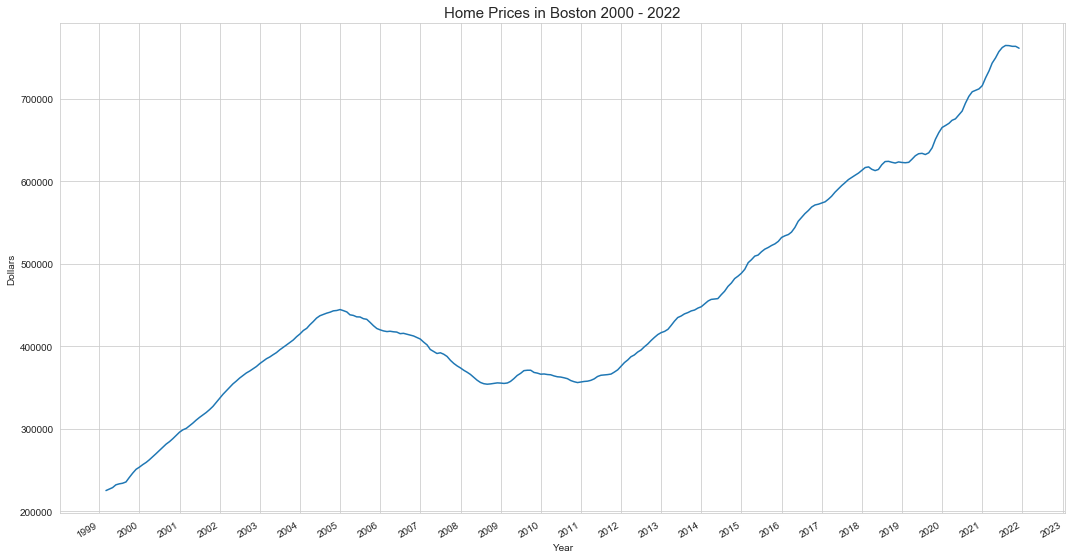

In [23]:
line,ax = plt.subplots(figsize=(18,10))
ax = sns.lineplot(x = "YYYY-MM-DD", y = "HomeValue", data=boston_restr)
ax.set_title("Home Prices in Boston 2000 - 2022", fontsize=15)
ax.set_xlabel ("Year")
ax.set_ylabel ("Dollars")

year_locator = mdates.MonthLocator(interval=12)
year_formatter = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(year_formatter)

line.autofmt_xdate()

plt.show()

#### Combining the line plots

In [24]:
seattle_restr.insert(2, "City", "Seattle")

In [25]:
seattle_restr.head(10)

,YYYY-MM-DD,HomeValue,City
0,2000-01-31,270063.0,Seattle
1,2000-02-29,271870.0,Seattle
2,2000-03-31,273518.0,Seattle
3,2000-04-30,276733.0,Seattle
4,2000-05-31,280062.0,Seattle
5,2000-06-30,282754.0,Seattle
6,2000-07-31,285756.0,Seattle
7,2000-08-31,287666.0,Seattle
8,2000-09-30,289352.0,Seattle
9,2000-10-31,290418.0,Seattle


In [26]:
boston_restr.insert(2, "City", "Boston")

In [27]:
boston_restr.head(10)

,YYYY-MM-DD,HomeValue,City
0,2000-01-31,225343.0,Boston
1,2000-02-29,227005.0,Boston
2,2000-03-31,228915.0,Boston
3,2000-04-30,232289.0,Boston
4,2000-05-31,233490.0,Boston
5,2000-06-30,234197.0,Boston
6,2000-07-31,235767.0,Boston
7,2000-08-31,241356.0,Boston
8,2000-09-30,246436.0,Boston
9,2000-10-31,251101.0,Boston


In [28]:
dataframes = [seattle_restr, boston_restr]
merged_df = pd.concat(dataframes)

In [29]:
merged_df

,YYYY-MM-DD,HomeValue,City
0,2000-01-31,270063.0,Seattle
1,2000-02-29,271870.0,Seattle
2,2000-03-31,273518.0,Seattle
3,2000-04-30,276733.0,Seattle
4,2000-05-31,280062.0,Seattle
...,...,...,...
269,2022-06-30,764472.0,Boston
270,2022-07-31,764290.0,Boston
271,2022-08-31,763425.0,Boston
272,2022-09-30,763430.0,Boston


In [30]:
merged_df["YYYY-MM-DD"] = pd.to_datetime(merged_df["YYYY-MM-DD"])

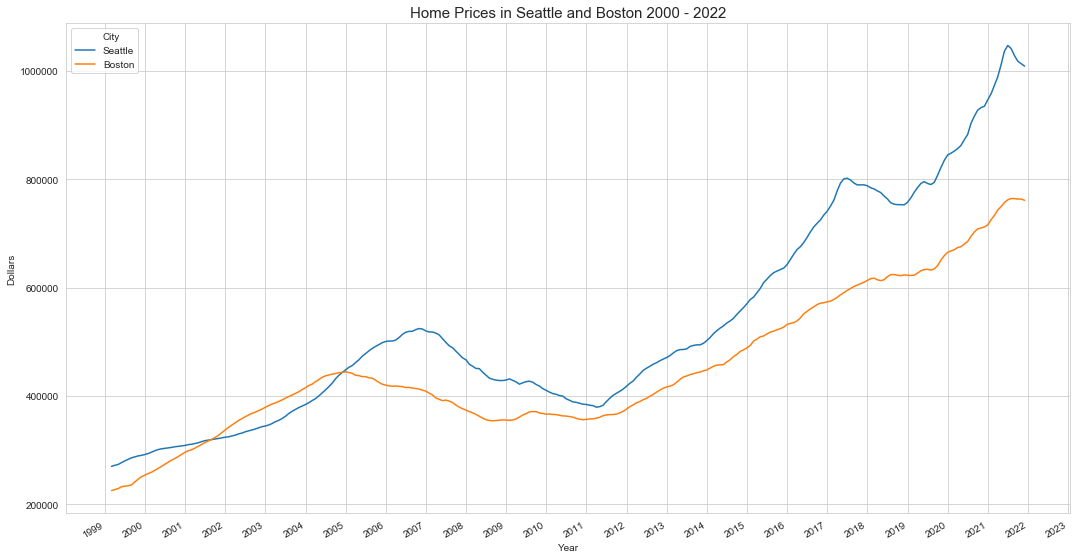

In [31]:
line,ax = plt.subplots(figsize=(18,10))
ax = sns.lineplot(x = "YYYY-MM-DD", y = "HomeValue", data=merged_df, hue="City")
ax.set_title("Home Prices in Seattle and Boston 2000 - 2022", fontsize=15)
ax.set_xlabel ("Year")
ax.set_ylabel ("Dollars")

year_locator = mdates.MonthLocator(interval=12)
year_formatter = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(year_formatter)

line.autofmt_xdate()

plt.show()